<a href="https://colab.research.google.com/github/MelomanCat/FaceExtraction/blob/main/ColorHistograms_of_extracted_face_region.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install facenet_pytorch

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 25.8 MB/s eta 0:00:00


Processing frame from the original video

Processing frame 1
Face detected in frame 0
x1: 558, y1: 133, x2: 793, y2: 469


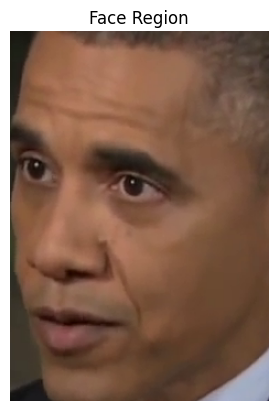

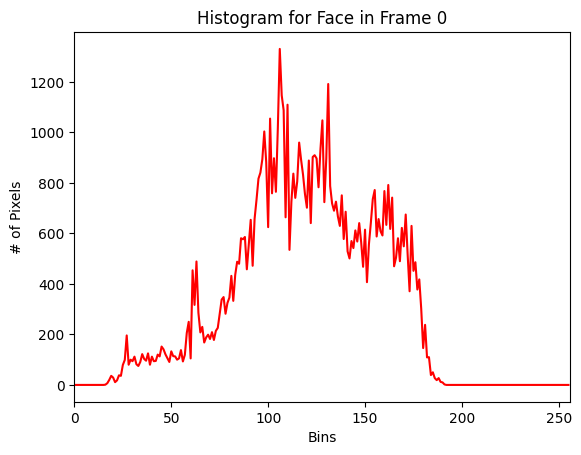

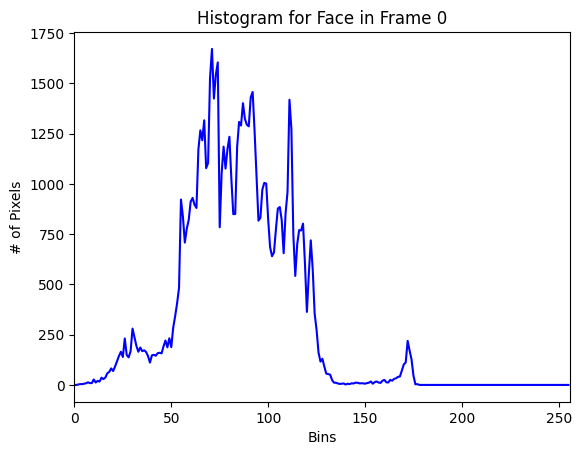

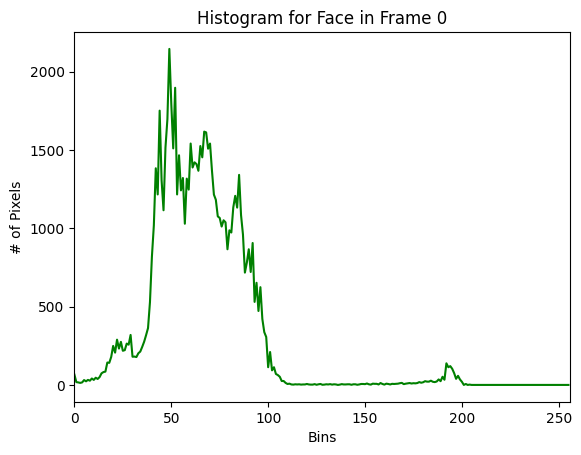

In [38]:
from facenet_pytorch import MTCNN
from google.colab.patches import cv2_imshow
import cv2
import numpy as np
import pandas as pd
import imutils
import json
import matplotlib.pyplot as plt

# Create face detector
mtcnn = MTCNN(margin=20, keep_all=True, post_process=False)

# Load video
video_path = '/content/drive/MyDrive/Colab Notebooks/OriginalSequences/183.mp4'
cap = cv2.VideoCapture(video_path)
frame_count = min(int(cap.get(cv2.CAP_PROP_FRAME_COUNT)), 1)

# Initialize DataFrame to store histograms
histograms_df = pd.DataFrame(columns=['Frame', 'Histogram'])

# Initialize colors for plotting histograms
colors = ("r", "b", "g")

# Process each frame
for frame_num in range(frame_count):
    # Read frame
    ret, frame = cap.read()
    if not ret:
        break

# Convert frame to RGB
frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

print(f"Processing frame {frame_num + 1}")

# Detect faces
boxes, probs = mtcnn.detect(frame_rgb)

# Check if faces were detected
if boxes is not None:
    for box in boxes:
        x1, y1, x2, y2 = box.astype(int)

# Output message
print(f"Face detected in frame {frame_num}")

# Check the detected face coordinates
print(f"x1: {x1}, y1: {y1}, x2: {x2}, y2: {y2}")

# Extract face region
original_face_region = frame_rgb[y1:y2, x1:x2]

# display the face region image
fig, ax = plt.subplots()
plt.imshow(original_face_region)
ax.set_title("Face Region")
ax.axis('off')
plt.show()

# Calculate histogram for the face region
chans = cv2.split(original_face_region)
histograms = []
for chan in chans:
    hist = cv2.calcHist([chan], [0], None, [256], [0, 256])
    histograms.append(hist)

# Plot histograms for each channel
for hist, color in zip(histograms, colors):
    plt.plot(hist, color=color)
    plt.xlim([0, 256])
    plt.title(f"Histogram for Face in Frame {frame_num}")
    plt.xlabel("Bins")
    plt.ylabel("# of Pixels")
    plt.show()

# Append histogram to DataFrame
histograms_df = pd.concat([histograms_df, pd.DataFrame({'Frame': frame_num, 'Histogram': [hist.flatten().tolist()]})], ignore_index=True)

# Convert histograms to JSON strings
histograms_json = histograms_df['Histogram'].apply(json.dumps)

# Replace the 'Histogram' column with JSON strings
histograms_df['Histogram'] = histograms_json

# Save histograms DataFrame to file
histograms_df.to_csv('/content/drive/MyDrive/Colab Notebooks/OriginalSequences/original_histograms.csv', index=False)

# Release video capture
cap.release()


Processing frame from the manipulated video and computing color histograms

Processing frame 1 of manipulated video
Face detected in frame 0 of manipulated video
x1: 546, y1: 152, x2: 781, y2: 467


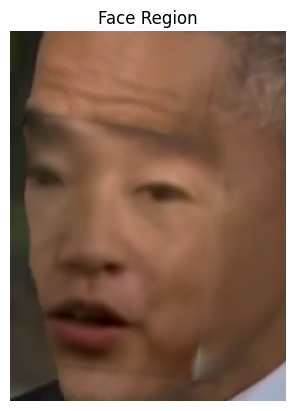

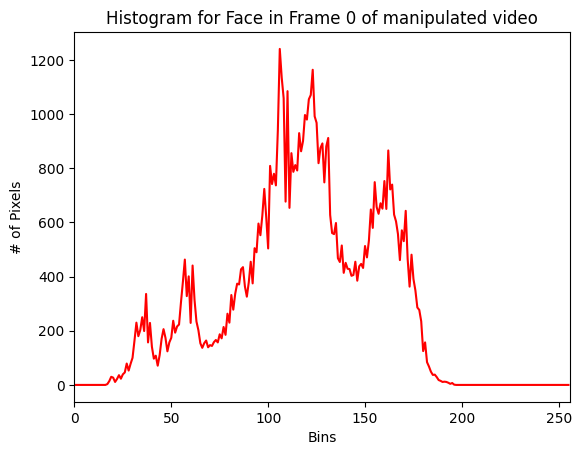

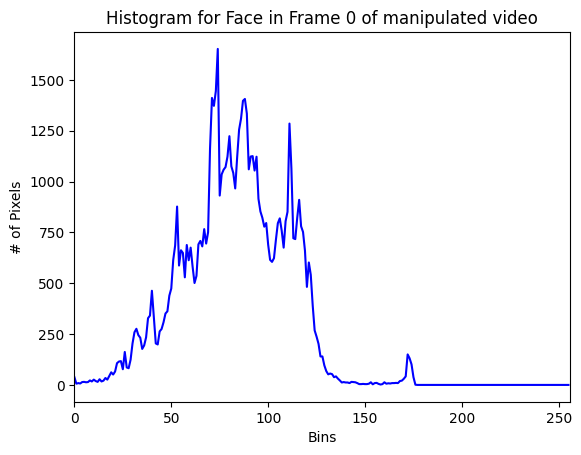

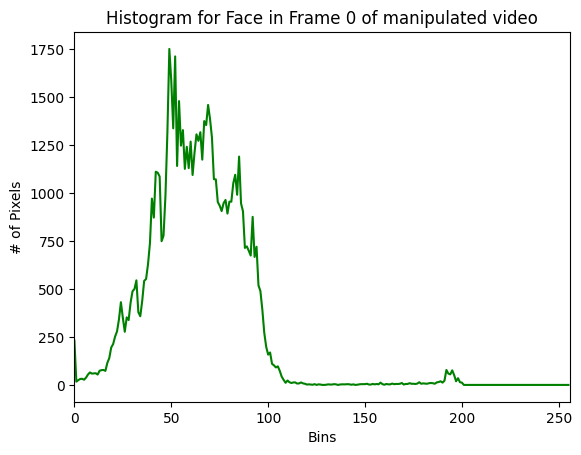

In [39]:
from facenet_pytorch import MTCNN
from google.colab.patches import cv2_imshow
import cv2
import numpy as np
import pandas as pd
import imutils
import json
import matplotlib.pyplot as plt

# Create face detector
mtcnn = MTCNN(margin=20, keep_all=True, post_process=False)

# Load video
manipulated_video_path = '/content/drive/MyDrive/Colab Notebooks/ManipulatedSequences/183_253.mp4'
manipulated_cap = cv2.VideoCapture(manipulated_video_path)
manipulated_frame_count = min(int(manipulated_cap.get(cv2.CAP_PROP_FRAME_COUNT)), 1)

# Initialize DataFrame to store histograms
manipulated_histograms_df = pd.DataFrame(columns=['Frame', 'Histogram'])

# Initialize colors for plotting histograms
colors = ("r", "b", "g")

# Process each frame
for frame_num in range(manipulated_frame_count):
    # Read frame
    ret, frame = manipulated_cap.read()
    if not ret:
        break

# Convert frame to RGB
frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

print(f"Processing frame {frame_num + 1} of manipulated video")

# Detect faces
boxes, probs = mtcnn.detect(frame_rgb)

# Check if faces were detected
if boxes is not None:
    for box in boxes:
        x1, y1, x2, y2 = box.astype(int)

# Output message
print(f"Face detected in frame {frame_num} of manipulated video")

# Check the detected face coordinates
print(f"x1: {x1}, y1: {y1}, x2: {x2}, y2: {y2}")

# Extract face region
manipulated_face_region = frame_rgb[y1:y2, x1:x2]

# display the face region image
fig, ax = plt.subplots()
plt.imshow(manipulated_face_region)
ax.set_title("Face Region")
ax.axis('off')
plt.show()

# Calculate histogram for the face region
chans = cv2.split(manipulated_face_region)
histograms = []
for chan in chans:
    hist = cv2.calcHist([chan], [0], None, [256], [0, 256])
    histograms.append(hist)

# Plot histograms for each channel
for hist, color in zip(histograms, colors):
    plt.plot(hist, color=color)
    plt.xlim([0, 256])
    plt.title(f"Histogram for Face in Frame {frame_num} of manipulated video")
    plt.xlabel("Bins")
    plt.ylabel("# of Pixels")
    plt.show()

# Append histogram to DataFrame
manipulated_histograms_df = pd.concat([manipulated_histograms_df, pd.DataFrame({'Frame': frame_num, 'Histogram': [hist.flatten().tolist()]})], ignore_index=True)

# Convert histograms to JSON strings
histograms_json = manipulated_histograms_df['Histogram'].apply(json.dumps)

# Replace the 'Histogram' column with JSON strings
manipulated_histograms_df['Histogram'] = histograms_json

# Save histograms DataFrame to file
manipulated_histograms_df.to_csv('/content/drive/MyDrive/Colab Notebooks/ManipulatedSequences/manipulated_histograms.csv', index=False)

# Release video capture
manipulated_cap.release()

The cell bellow will contain a code that will compute histograms for original and manipulated videos face extractions and compare those histograms

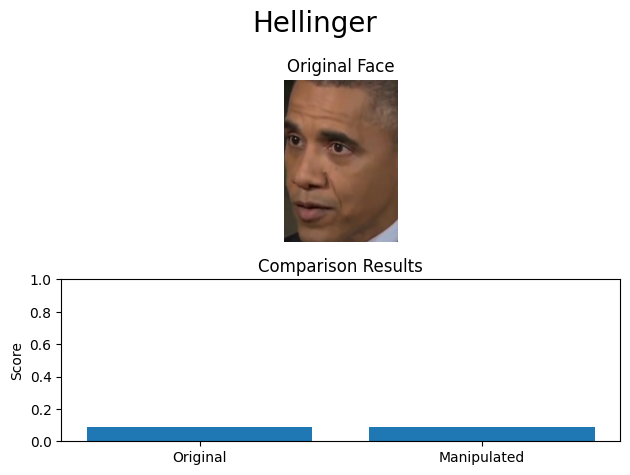

In [42]:
import cv2
import pandas as pd
import matplotlib.pyplot as plt
import ast

# Load histograms from files
original_histograms = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/OriginalSequences/original_histograms.csv')
manipulated_histograms = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ManipulatedSequences/manipulated_histograms.csv')

# Convert histogram strings to numpy arrays
original_histograms['Histogram'] = original_histograms['Histogram'].apply(ast.literal_eval)
manipulated_histograms['Histogram'] = manipulated_histograms['Histogram'].apply(ast.literal_eval)

# Initialize OpenCV methods for histogram comparison
OPENCV_METHODS = (
    ("Correlation", cv2.HISTCMP_CORREL),
    ("Chi-Squared", cv2.HISTCMP_CHISQR),
    ("Intersection", cv2.HISTCMP_INTERSECT),
    ("Hellinger", cv2.HISTCMP_BHATTACHARYYA))

# Initialize DataFrame to store comparison results
comparison_results = pd.DataFrame(columns=['Method', 'Comparison'])

# Compare histograms using OpenCV methods
for (methodName, method) in OPENCV_METHODS:
    # Calculate comparison score
    scores = []
    for i in range(len(original_histograms)):
        original_hist = np.array(original_histograms.iloc[i]['Histogram']).astype(np.float32)
        manipulated_hist = np.array(manipulated_histograms.iloc[i]['Histogram']).astype(np.float32)
        score = cv2.compareHist(original_hist, manipulated_hist, method)
        scores.append(score)

# Append comparison result to DataFrame
comparison_results = pd.concat([comparison_results, pd.DataFrame({'Method': [methodName]*len(scores), 'Comparison': scores})], ignore_index=True)

# Plot the comparison results
for methodName in comparison_results['Method'].unique():
    fig = plt.figure("Results: %s" % (methodName))
    fig.suptitle(methodName, fontsize=20)
    method_data = comparison_results[comparison_results['Method'] == methodName]
    for i, score in enumerate(method_data['Comparison']):
        plt.subplot(2, len(method_data), i + 1)  # Changed 1 to 2 to add a new row of subplots
        if i == 0:
            plt.title("Original Face")
            plt.imshow(original_face_region)
        elif i == 1:
            plt.title("Manipulated Face")
            plt.imshow(manipulated_face_region)
        plt.xlabel(f"Score: {score:.2f}")  # Add score as xlabel
        plt.axis("off")

    # Show the comparison results
    plt.subplot(2, len(method_data), len(method_data) + 1)  # Changed 1 to 2 to add a new row of subplots
    plt.title("Comparison Results")
    plt.bar(['Original', 'Manipulated'], method_data['Comparison'])  # Plot comparison results as a bar chart
    plt.ylabel("Score")
    plt.ylim(0, 1)  # Set y-axis limit to match the score range
    plt.tight_layout()

plt.show()
